
# __Investigating pricing factors inside the Real Estate market of Brazil__
__Created by__: Anish Puthuraya, Anmol Srivastava, Hector He, Prateek Naharia, Yuesen Zhang

<!-- ![Alt Text](image path "title") -->
<p><img src="https://s1.static.properati.com.ar/assets/img/isologo-properati-negro.svg" alt="Alt Text" title="Optional Title", width = 400></p>
<!-- [![Alt Text](image path "title")](link) -->
<p><a href="https://www.properati.com.ar/?utm_source=properati.com&utm_medium=direct">
    <!--<img src="https://s1.static.properati.com.ar/assets/img/properati-tools.png" alt="Alt Text" title="Optional Title"> --></a></p>
    
***

<a id="Main"></a>

## Table of Contents

#### I. [Introduction](#Introduction) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Motivation](#Motivation)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Objective](#Objective)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [Data Brief](#DB)

#### II. [Data Reading](#DataReading) 



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Input Data](#IData)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Data Schema](#DS)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [Gaining Data Understanding](#Dunderstanding)

#### III. [Data Cleaning](#DataCleaning)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Column Selection](#CS)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Spurious, Splits and Merges](#Merge)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [Imputing Nulls](#ImputN)

#### IV. [Questions with Answers](#QA)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1. [Geographical](#Q1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2. [Number/Area of rooms](#Q2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3. [Property Type and Location](#Q3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4. [Urbanization](#Q4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5. [Economic Status](#Q5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6. [Municipal Expenditure vs Population](#Q6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 7. [Municipal Expenditure and Traffic vs Price](#Q7)

#### V. [Conclusions](#Conclusions)

#### VI. [References](#References)

<hr>
<a id="Introduction"></a>

## I. Introduction
[Return To Index](#Main)

#### a. Motivation <a id="Motivation"></a>
A house is usually the most important purchase of an individual’s lifetime. With soaring prices and unpredictable factors such as socio-economic conditions as well as fraudulent listings, it is quite important to keep an objective eye in understanding the pricing landscape, which is what our analysis aims to achieve.

#### b. Objective <a id="Objective"></a>
Our goal is to analyze the Monthly property listing data for Brazil with a focus on understanding the factors behind pricing of the listings, namely:

1. __Geographical__ - We will find optimal geographical locations in terms of price & quality of the area (with regards to Human Development Index) 

2. __Number/Area of rooms__ - Based on the number of rooms, we will find the relationship with the pricing of the properties. 

3. __Property Type__ - We will analyze the variation of price with property type (Houses, Apartments, Penthouses and Stores)

#### c. Data Brief <a id="DB"></a>

The dataset contains the sale and rent listing of properties such as houses, stores, and penthouses available on Properati for Brazil as of Jan 2015.

The original dataset comprises __27__ fields (all nullable) and __169,220__ records and occupies 129.26 MB of storage as of November 15, 2022.

__Main Data sourced from
Brazil Real Estate Listings - BigQuery Public Datasets. See __[here](http://www.properati.com.br/dados)__.__

__<p><a href="https://www.properati.com.ar/?utm_source=properati.com&utm_medium=direct" title="Optional Title">Properati Website Link</a></p>__

__Cities Data sourced from
https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES_REV2022.CSV__

__State Data sourced from
https://en.wikipedia.org/wiki/ISO_3166-2:BR__




<hr>
<a id="DataReading"></a>

## II. Data Reading
### a. Input Data <a id="IData"></a>
#### Import Packages

[Return To Index](#Main)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery
import seaborn as sns
!pip3 install lxml
import lxml

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

#### Get Real Estate Data

In [2]:
client = bigquery.Client()
sql = """
    SELECT * FROM `properati-data-public.properties_br.properties_rent_201501` UNION ALL
    SELECT * FROM `properati-data-public.properties_br.properties_sell_201501`
"""
main_data = client.query(sql).to_dataframe()

#### Get Cities Data

In [3]:
cities_data = pd.read_csv("gs://ba780-b1-supplementary-data/BRAZIL_CITIES_REV2022.CSV")

#### Get State Data

In [4]:
state_data = pd.read_html("https://en.wikipedia.org/wiki/ISO_3166-2:BR")[0]

<hr>

### b. Data Schema <a id="DS"></a>
#### Main Data

[Return To Index](#Main)

`id` - STRING - ID for the data.

`created_on` - OBJECT - The date the data are created.

`operation` - OBJECT - Operation of either rent or sell 

`property_type` - OBJECT - The type of the property includes store, apartment, and house.

`place_name` - OBJECT - The place name in Brazil.

`place_with_parent_names` - OBJECT - The place in the form of Country|state|city.

`country_name` - OBJECT - The country name.

`state_name` - OBJECT - The state name in Brazil.

`geonames_id` - FLOAT - All NaN value.

`lat_lon` - OBJECT - Combination between latitude and longitude.

`lat` (latitude) - FLOAT - Coordinate that specifies the north–south position of a point. 

`lon` (longitude) - FLOAT - Coordinate that specifies the east–west position of a point.

`price` - FLOAT - The price in the currency as per the currency column.

`currency` - OBJECT - Currency in either BRL/USD/EUR.

`price_aprox_local_currency` - FLOAT - Price in BRL currency.

`surface_total_in_m2` - INTEGER - Surface total area in meter square, calculated by adding all the areas on the surface.

`surface_covered_in_m2` - INTEGER - Surface covered in meter square, area that cover the entire surface without gaps or overlaps.

`price_aprox_usd` - INTEGER - Price in USD.

`price_per_m2` - FLOAT - The price in meter square.

`floor` - INTEGER - Number of floors in the house.

`rooms` - INTEGER - Number of rooms in the house.

`expenses` - FLOAT - The utilities such as electricity and gas, as well as insurance for the property.

`properati_url` - OBJECT -The URL of the property.

`description` - OBJECT - The description of the property.

`title` - OBJECT - The title of the property.

`image_thumbnail` - OBJECT - The image link of the property.
***

#### Cities Data

`CITY` - OBJECT - The city in Brazil.

`STATE` - OBJECT - The state in Brazil.

`CAPITAL` - INTEGER - Whether the city is the capital of the state or not

`IDHM` - FLOAT - Integrated Detection of Hazardous Materials

`LONG` (longitude) - FLOAT - Coordinate that specifies the east–west position of a point.

`LAT` (latitude) - FLOAT - Coordinate that specifies the north–south position of a point. 

`GDP` - INTEGER -  The total monetary or market value of all the finished goods and services produced within Brazil.

`GDP_CAPITA` - FLOAT - The GDP per capita.

`HDI` - FLOAT - Summary measure of average achievement in key dimensions of human development.

`RURAL_URBAN` - OBJECT - We have Urbano, Rural Adjacente, Rural Remoto, Intermediário Adjacente, Intermediário Remoto, and  Sem classificação 

***

The Brazilian territory has very diverse accessibility conditions. This type of classification is shown by "Adjacente" and "Remoto", where the former represents cities closer to major cities, while the latter are the cities which are further away.

Further, some cities are included in Brazil's 2030 plan while some are not. This distinction is made by "Intermediário" and "Rural", where the former indicates cities which are included in the plan, while the latter depicts cities which are not.

***

#### State Data
`Subdivision name (pt)` - OBJECT - Subdivision name of the state.

`Subdivision category` - OBJECT - Subdivision category in state or federal district.

***



### c. Gaining Data Understanding <a id="Dunderstanding"></a>


[Return To Index](#Main)

In [5]:
main_data.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,f73c373e0588bf568164a057dd94203ac87d47b1,2014-08-07,rent,store,Catu,|Brasil|Bahia|Catu|,Brasil,Bahia,NaN,,NaN,NaN,0.0,,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.br/mfye_alugar_outros...,"Otimo Imovel com o melhor valor da regiao, con...",Exclusividade! - Loja Em Catu,https://thumbs4.properati.com/3/jA8isZw8Xju7z3...
1,d6d377927ab49671acdd38aa6f661a460601a88b,2015-01-20,rent,apartment,Pernambuco,|Brasil|Pernambuco|,Brasil,Pernambuco,NaN,"-8.126271,-34.903793",-8.126271,-34.903793,1200.0,BRL,1184.32,383.55,NaN,63.0,6.088095,19.047619,1.0,2.0,NaN,http://www.properati.com.br/w71k_alugar_aparta...,CONTATOS: Claro: 81./ Tim: 81./ Oi: 81./ Vivo:...,"Apartamento de 2 quartos, DCE, 1.º Andar, 63 m...",https://thumbs4.properati.com/0/B9BCwP1HK7NvZI...
2,c6826a9508436920fd59b46a202354f3e4823d22,2014-10-29,rent,store,São Paulo,|Brasil|São Paulo|,Brasil,São Paulo,NaN,"-23.1546253,-45.7906242",-23.154625,-45.790624,0.0,BRL,0.00,0.00,NaN,3800.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.br/s41f_alugar_comerc...,CondomÃ­nio com 22 MÃ³dulos de GalpÃµes; 3.80...,"Comercial em Caçapava, no bairro Caçapava",https://thumbs4.properati.com/1/J2n8nXVlvduy6E...


For now, we have total 169220 rows with 27 columns as the size of the dataset

In [6]:
main_data.shape

(169220, 27)

In [7]:
main_data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,0.0,61886.000000,61886.000000,1.689880e+05,1.689880e+05,1.689880e+05,69199.000000,1.306530e+05,1.236910e+05,1.236770e+05,15218.000000,142464.000000,5.324900e+04
mean,NaN,-22.745939,-46.360421,7.701275e+05,7.526583e+05,2.437523e+05,340.402751,9.604415e+03,2.095306e+03,6.589627e+03,8.050532,2.604869,3.035432e+03
std,NaN,3.726767,2.151972,1.634134e+06,1.607475e+06,5.205891e+05,806.566555,3.353577e+06,2.405072e+04,7.598211e+04,38.538562,1.036252,8.600581e+04
min,NaN,-37.948181,-70.193504,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.900000e-07,1.000000,1.000000,1.000000e+00
25%,NaN,-23.667447,-46.866470,2.400000e+05,2.296255e+05,7.436541e+04,95.000000,6.800000e+01,9.740640e+02,3.090909e+03,3.000000,2.000000,3.500000e+02
50%,NaN,-23.583368,-46.664062,4.400000e+05,4.268123e+05,1.382254e+05,165.000000,1.090000e+02,1.467697e+03,4.631068e+03,6.000000,3.000000,5.750000e+02
75%,NaN,-23.292068,-46.477087,8.500000e+05,8.218920e+05,2.661740e+05,320.000000,1.930000e+02,2.224240e+03,6.987342e+03,10.000000,3.000000,1.000000e+03
max,NaN,0.034745,-34.808968,1.111111e+08,1.096621e+08,3.551464e+07,48991.000000,1.212121e+09,6.896672e+06,2.202383e+07,4404.000000,37.000000,9.000000e+06


In [8]:
main_data.nunique()

id                            169220
created_on                       211
operation                          2
property_type                      4
place_name                      3307
place_with_parent_names         4066
country_name                       1
state_name                        24
geonames_id                        0
lat_lon                        20660
lat                            20420
lon                            19989
price                           8000
currency                           4
price_aprox_local_currency     28171
price_aprox_usd                28171
surface_total_in_m2             1844
surface_covered_in_m2           1441
price_usd_per_m2               68551
price_per_m2                   29550
floor                             65
rooms                             29
expenses                        2580
properati_url                 169220
description                   138374
title                          66963
image_thumbnail               123418
d

***

Looking at the distributions across the histograms below, we observe that the data values are skewed for the majority of the columns, like floor and price_usd_per_m2, etc. Hence, we can consider the __median__ values later for imputing nulls for these columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


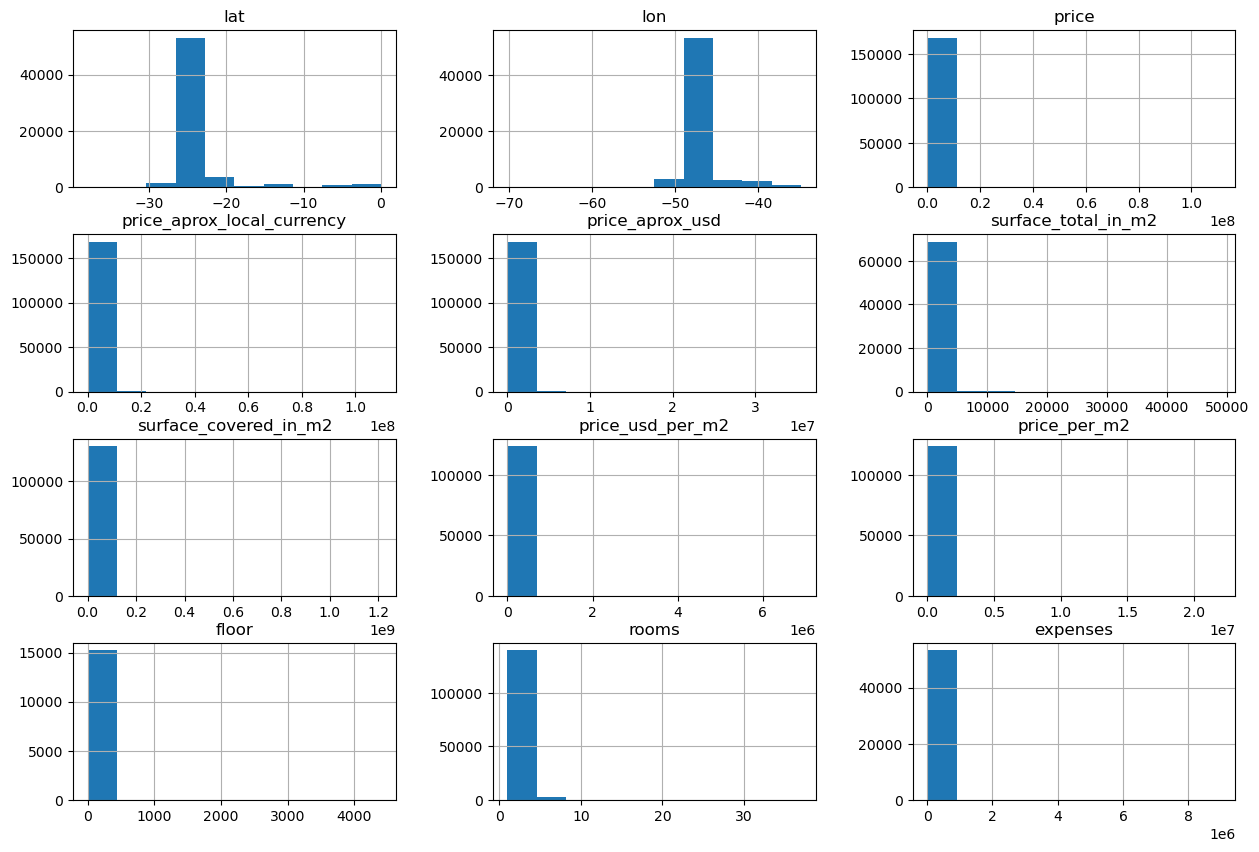

In [9]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,10));
ax = fig.gca();
main_data.drop("geonames_id", axis = 1).hist(ax = ax);

Let's further explore the __boxplot__ (including outliers) of the property prices varying across property_type and state_name

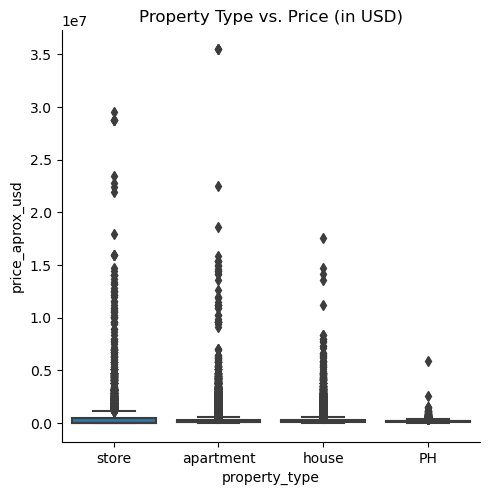

In [10]:
sns.catplot(x = "property_type", y = "price_aprox_usd", data = main_data, kind = "box")
plt.title("Property Type vs. Price (in USD)");

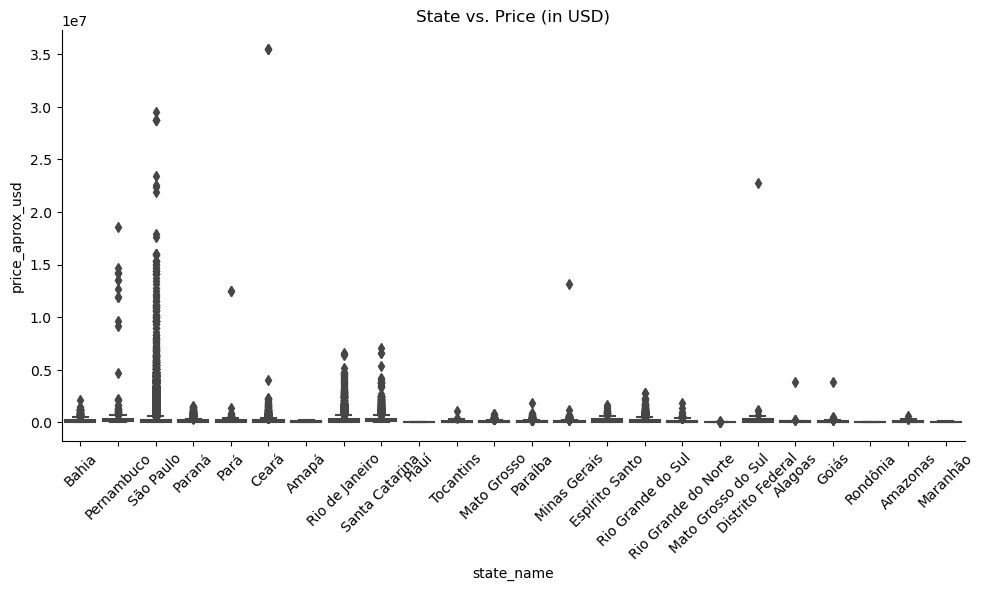

In [11]:
sns.catplot(x = "state_name", y = "price_aprox_usd", data = main_data, kind = "box", aspect = 2)
plt.xticks(rotation=45);
plt.title("State vs. Price (in USD)");

<hr />
<a id="DataCleaning"></a>

## III. Data Cleaning
### a. Column Selection <a id="CS"></a>
#### Main Data

[Return To Index](#Main)

In [12]:
# DROP COLUMNS FROM REAL ESTATE DATA
main_data = main_data.drop("id", axis=1)                         # Probably not needed
main_data = main_data.drop("geonames_id", axis=1)                # All values are null
main_data = main_data.drop("place_with_parent_names", axis=1)    # Combination of place_name, country_name & state_name
main_data = main_data.drop("price_aprox_local_currency", axis=1) # Not needed when we have price in USD
main_data = main_data.drop("currency", axis=1)                   # Not needed when we have price in USD
main_data = main_data.drop("price", axis=1)                      # Not needed when we have price in USD
main_data = main_data.drop("price_per_m2", axis=1)               # Not needed when we have price in USD
main_data = main_data.drop("lat_lon", axis=1)                    # Lat and Lon are already provided by split
main_data = main_data.drop("properati_url", axis=1)              # Dropping URL
main_data = main_data.drop("image_thumbnail", axis=1)            # Dropping Image

#### Cities Data

In [13]:
# SELECT REQUIRED COLUMNS FROM CITIES DATA
# Further, the POST_OFFICE is causing 1 duplicate, and there are 2 more duplicates present

cities_data = cities_data\
    .drop("POST_OFFICES", axis=1).drop_duplicates()\
    [["CITY", "STATE", "CAPITAL", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", \
     "AREA", "ESTIMATED_POP", "RURAL_URBAN", "TAXES", "GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "Cars", \
     "Motorcycles", "UBER", "MAC", "WAL-MART"]]

#### State Data

In [14]:
# SELECT REQUIRED COLUMNS FROM STATE DATA
state_data = state_data[["Code", "Subdivision name (pt)"]]

<hr />

### b. Spurious, Splits and Merges <a id="Merge"></a>

#### Main Data

[Return To Index](#Main)


In [15]:
main_data.loc[main_data.price_aprox_usd == 0].shape

(9811, 17)

There are 9811 properties with a price of 0, we remove these rows

In [16]:
# REMOVE ROWS WITH PRICE = 0
main_data = main_data[main_data["price_aprox_usd"] != 0]

#### State Data

In [17]:
# SPLIT COLUMNS IN STATE DATA
state_data["Code"] = state_data["Code"].str.split(pat = '-', expand = True)[1]
state_data.columns = ["CODE", "STATE"]

#### Get State Name into the Cities Data

In [18]:
cities_data = cities_data.merge(state_data, left_on="STATE", right_on="CODE", how="left")
cities_data = cities_data[['CITY', 'STATE_y', 'CAPITAL', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao', \
'LONG', 'LAT','ALT', 'AREA', 'ESTIMATED_POP', 'RURAL_URBAN', 'TAXES', 'GDP', 'GDP_CAPITA', 'MUN_EXPENDIT', 'COMP_TOT'\
, 'Cars', 'Motorcycles', 'UBER', 'MAC', 'WAL-MART']]
cities_data.rename(columns={"STATE_y" : "STATE"}, inplace=True)

#### Convert City Names into Lower-case in Main Data and Cities Data

We observed that the names of some of the cities are spelt differently in cities_data and main_data. For example, in cities_data, we have a city named "Palmeira Dos Índios", but in the main_data, this city has been named "Palmeira dos Índios"

In [19]:
main_data[main_data.place_name=='Palmeira dos Índios'].shape[0]

1

In [20]:
cities_data[cities_data.CITY=='Palmeira Dos Índios'].shape[0]

1

Therefore, we convert all city names into lower case, in order to make sure every city in cities_data has a match in main_data when merging tables with city name as a key.

In [21]:
main_data['place_name'] = main_data['place_name'].str.lower()
cities_data['CITY'] = cities_data['CITY'].str.lower()

<hr>

### c. Imputing Nulls <a id="ImputN"></a>
[Return To Index](#Main)

We will be imputing nulls using the strategy of similarity. If a row is null within a particular column, we will look at other rows with similar column values to infer the value of the column.

This involves building a reference table for each column we are trying to impute for. This table depicts an aggregated value (mean, median etc) for this column across other column groups (let's call them Identifiers).

We then use this reference table to lookup the value of this column by matching the identifier columns, and then fill this value instead of null

Let's explore the NULL values within the raw data.

<a id="msno"></a>

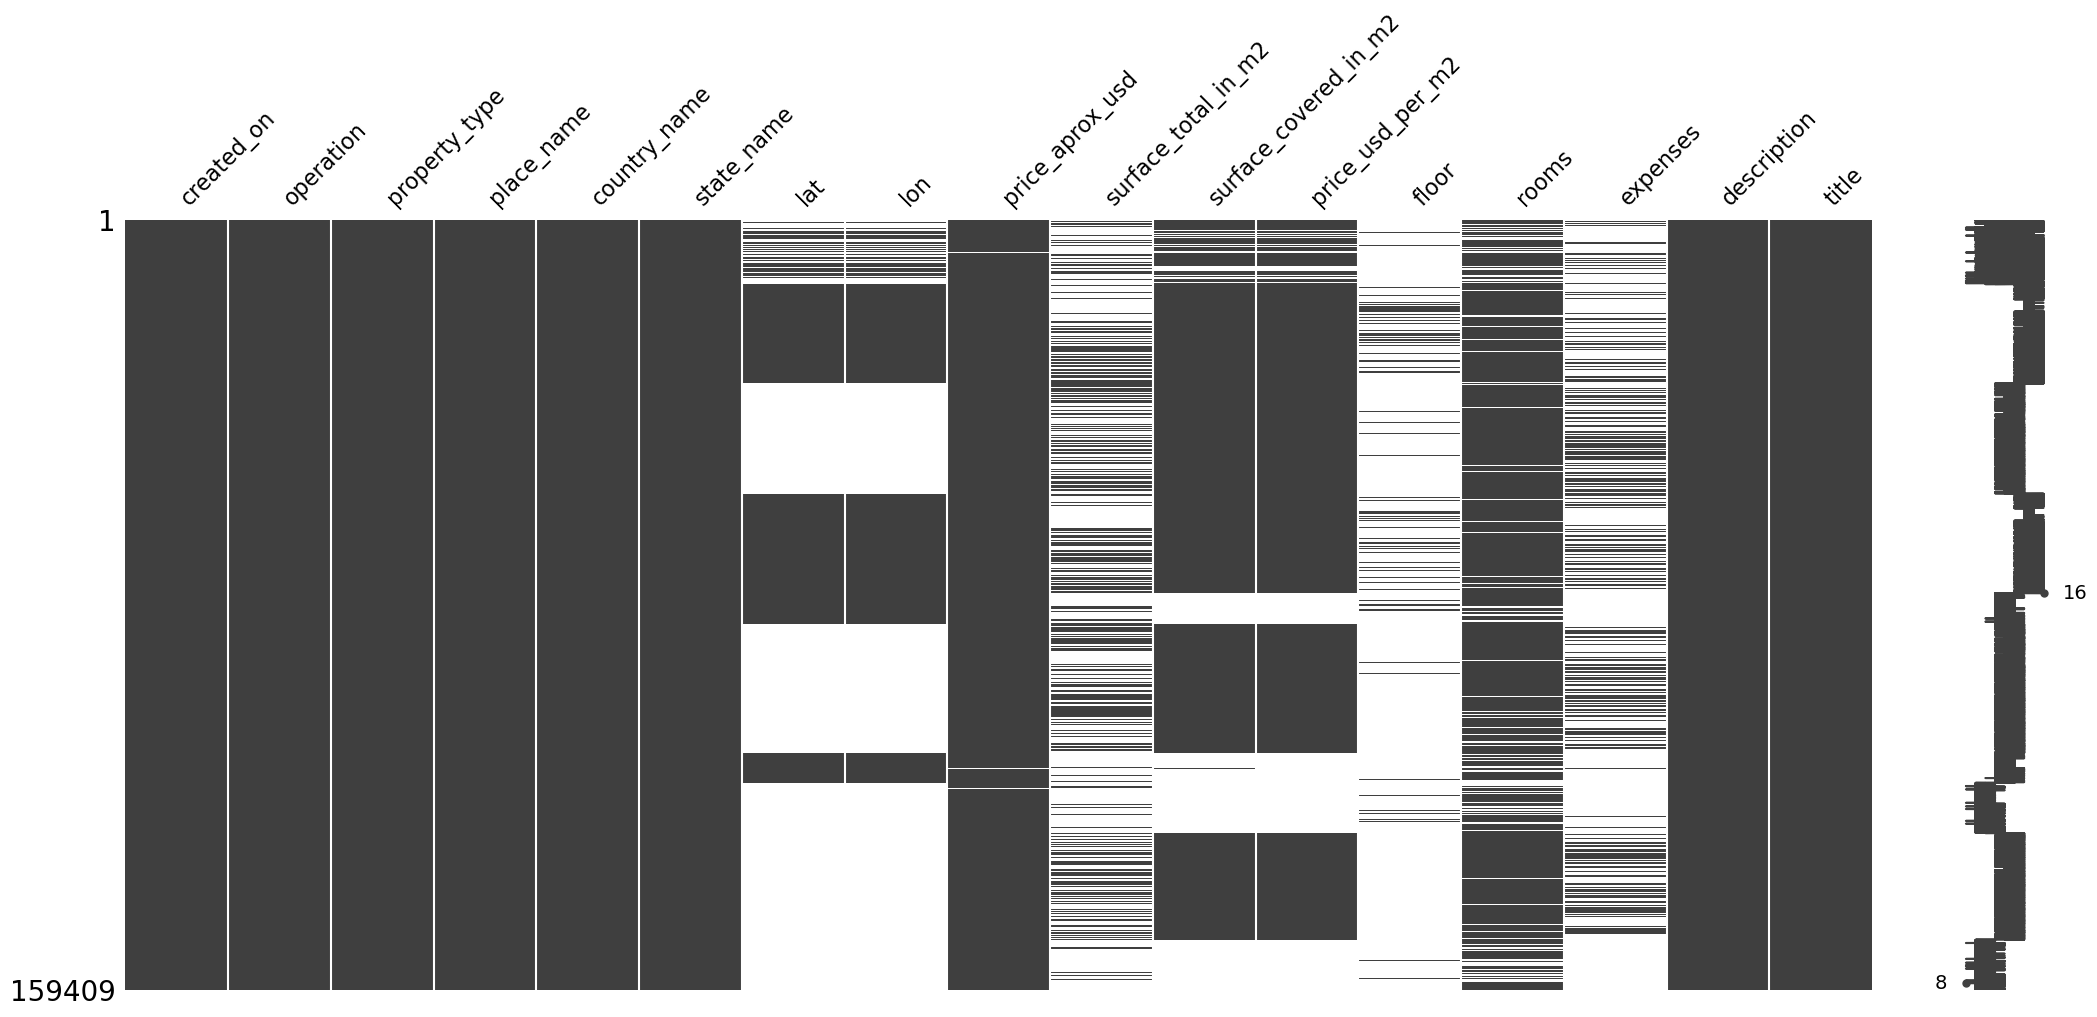

In [22]:
import missingno as msno
msno.matrix(main_data);


[Jump to After Imputation](#AfterImputation)

Let's also check with the sum of total null values for all the columns, to have the exact count of nulls




In [23]:
main_data.isna().sum()

created_on                    0
operation                     0
property_type                 0
place_name                    0
country_name                  0
state_name                    0
lat                       99157
lon                       99157
price_aprox_usd             232
surface_total_in_m2       94081
surface_covered_in_m2     35641
price_usd_per_m2          35732
floor                    144300
rooms                     22630
expenses                 111027
description                   0
title                         0
dtype: int64

#### Floor
***
Currently, there are __144300__ nulls present in the floor columns out of all __159409__ rows, which makes it to __90.52%__ of data missing __(~91%)__ for the floor column. Hence, for the floor column, we will be grouping the data on the property type and calculate the median number of floors in the property for each type to proceed with the process of replacing nulls.

As we saw in the above histograms, that the distribution for the data values in the floor column was skewed, so we will consider the median values for replacing the nulls. 

In the below visualization, we can see that there is a relevant variation of the values across various property types and the median of the floor, so we can consider the "property type" column to replace the missing data for the floor.

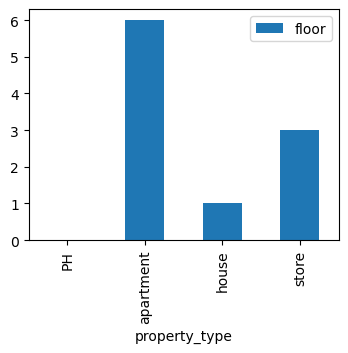

In [24]:
main_data\
    .groupby("property_type").median("floor").reset_index()\
    [["property_type", "floor"]].plot(x="property_type", y="floor", kind="bar", figsize=(4,3));

</p>
Looking at the values of mean/median below here - specifically for floors, it doesn’t make sense to use, the “mean” of floors across the entire data to fill the null values. Therefore, this method provides a good estimate alongside a sound business reasoning to solidify our belief about the supposed value for the number of floors when it is null, instead of dropping the whole floor column.</p>

In [25]:
reference_table_floor = main_data\
    .dropna(subset=["floor"])\
    .groupby("property_type")\
    .agg(mean=('floor', np.mean), median=('floor', np.median))\
    .reset_index()

reference_table_floor

,property_type,mean,median
0,apartment,8.017430,6.0
1,house,1.444444,1.0
2,store,45.545455,3.0


In [26]:
reference_table_floor.drop("mean", axis = 1, inplace = True)
reference_table_floor.columns = ["property_type", "floor"]

Now we join the above created reference table (which has the median value for each property type), to the main table, replacing the nulls in the floor column, with the median of each property type. 

In [27]:
main_data_imputed_floor = main_data\
    [main_data["floor"].isnull()]\
    .drop("floor", axis=1)\
    .merge(reference_table_floor, on="property_type", how="left")

After the join, we modify the order of the columns with the original column order we have.

In [28]:
main_data_imputed_floor = main_data_imputed_floor[['created_on', 'operation', 'property_type', 'place_name', \
   'country_name', 'state_name', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', \
   'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title']]

main_data = pd.concat([main_data[~main_data["floor"].isnull()], main_data_imputed_floor])

After we join the table, we observe we still have around __2000__ rows missing (almost negligible compared to the whole data). It is because of the PH (Penthouse) values in the property type has all nulls in the floor column. There are no values present for the "Penthouse" in the data (2211 in count). Hence, we have only the PH values as nulls. 

#### Price per m<sup>2</sup>
***

In this column, there were initially __35732__ nulls which account for __22.42%__ of all __159409__ rows in the dataset. To impute this, we built a reference table with median values of price_per_m<sup>2</sup> grouped by the State, Property type and Operation. This is because these 3 columns particularly showcase extreme contrast for the values in price per m<sup>2</sup>:

- *State* - From a geographical aspect, it makes sense that some states would be more expensive in terms of price per m<sup>2</sup> than others

- *Property Type* - It makes sense that, for example, price per m<sup>2</sup> of penthouses would be different from apartments

- *Operation* - From an operational perspective, it makes sense that price per m<sup>2</sup> for rental properties would be lesser than properties for sale

__Note:__ The reason for using "median" instead of "mean" is that this column is extremely skewed

In [29]:
reference_ppm2 = main_data\
  .dropna(subset=["price_usd_per_m2"])\
  .groupby(["state_name", "property_type", "operation"])\
  .agg({"price_usd_per_m2":"median"})\
  .reset_index()

Further, we join this table with the main_data on the state, property type and operation to impute Null values and then concatenate with the main data

In [30]:
main_data_imputed_ppm2 = main_data[main_data["price_usd_per_m2"].isnull()]\
    .drop("price_usd_per_m2", axis=1)\
    .merge(reference_ppm2, how="left", on=['state_name', 'property_type', 'operation'])

main_data_imputed_ppm2 = main_data_imputed_ppm2[
    ['created_on', 'operation', 'property_type', 'place_name', 'country_name', 'state_name', 'lat', 'lon', \
     'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', \
     'expenses','description', 'title']]

main_data = pd.concat([main_data[~main_data["price_usd_per_m2"].isnull()], main_data_imputed_ppm2])

#### Expenses
***

For the Expenses column, there are __111,027__ missing values, accounting for __69.65%__ of all __159409__ rows in the dataset and for the purpose of imputation, we will be grouping the data on the property type and operation type, calculating the median of the expenses for each type. We group by property type because the average expenses varies across different property types (and operation types), and we choose median since there are extreme expenses values within each property type.

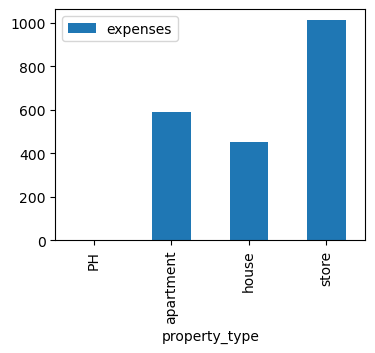

In [31]:
main_data\
    .groupby("property_type").median("expenses").reset_index()\
    [["property_type", "expenses"]].plot(x="property_type", y="expenses", kind="bar", figsize=(4,3));

In [32]:
expense_table = main_data\
    .dropna(subset=["expenses"])\
    .groupby(["property_type","operation"])\
    .agg({"expenses": "median"})\
    .reset_index()
expense_table

,property_type,operation,expenses
0,apartment,rent,565.5
1,apartment,sell,599.0
2,house,rent,515.0
3,house,sell,450.0
4,store,rent,1225.0
5,store,sell,920.5


***
Now we have our reference table for the expenses, for each combination of property type and operation. We will now join this table with the main table, to replace the null values in expenses with the mean values for type of property and operations, as the distribution of expenses is not very skewed.

In [33]:
main_data_imputed_expenses = main_data\
    [main_data["expenses"].isnull()]\
    .drop("expenses", axis=1)\
    .merge(expense_table, on=["property_type","operation"], how="left")

After the join, we modify the order of the columns with the original column order we have.

In [34]:
main_data_imputed_expenses = main_data_imputed_expenses[['created_on', 'operation', 'property_type', 'place_name', \
                           'country_name', 'state_name', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2', \
                           'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'description', \
                           'title']]

main_data = pd.concat([main_data[~main_data["expenses"].isnull()], main_data_imputed_expenses])

After we join the table, we observe we again have around 2000 rows missing (almost negligible compared to the whole data). It is because of the PH values in the property type has all nulls in the expense column. There are no values present for the "Penthouse" in the data (2211 in count). Hence, we have only the PH values as nulls. 

#### Longitude/Latitude
***

Step 1: After initial examination, we discovered that __99157__ values are missing in the latitude and longitude columns (both columns are missing simultaneously), that is 62.20% of all 159409 rows in the main dataset. To impute those missing values, we used each city's and state's average lat/lon of different price range.

First, we determine the range of property prices: some expensive properties could be clustered around neighborhoods where rich people live.

In [35]:
main_data['price_usd_per_m2'].describe()

count    1.593580e+05
mean     1.957519e+03
std      2.119240e+04
min      3.100103e-07
25%      1.045709e+03
50%      1.471695e+03
75%      1.983337e+03
max      6.896672e+06
Name: price_usd_per_m2, dtype: float64

***
We divide the range of property into 3 categories: cheap (below 900 USD per m<sup>2</sup>), common (between 900 USD to 3000 USD per m<sup>2</sup>) and luxury (above 3000 USD per m<sup>2</sup>), by creating a new temporary column called "price_range". This new column is for step 1 of imputation only, and is dropped later for consistency. groupby for the non-exist price range (later dropped by "dropna").
***

In [36]:
bins = [main_data['price_usd_per_m2'].min(), 900, 3000, main_data['price_usd_per_m2'].max()]
labels=['cheap','common','luxury']
main_data['price_range'] = pd.cut(main_data['price_usd_per_m2'], bins=bins, labels=labels)
main_data.tail(3)

,created_on,operation,property_type,place_name,country_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,description,title,price_range
111024,2014-12-21,sell,house,condomínio jardim das palmeiras,Brasil,São Paulo,NaN,NaN,383558.14,NaN,NaN,1156.114936,1.0,5.0,450.0,casa condominio jardim das palmeiras (com casa...,"Casa Condomínio Jardim Das Palmeiras, Bragança...",common
111025,2014-09-30,sell,house,parque residencial cândido portinari,Brasil,São Paulo,NaN,NaN,122126.88,336.0,NaN,1156.114936,1.0,4.0,450.0,"Casa com 4 dormitórios, sendo 1 suite, 2 banhe...",Casa Cândido Portinari,common
111026,2015-01-22,sell,house,conjunto residencial galo branco,Brasil,São Paulo,NaN,NaN,70457.81,125.0,NaN,1156.114936,1.0,3.0,450.0,"Casa nova toda em piso cerâmica, 2 vagas de ga...","Casa residencial à venda, Conjunto Residencia...",common


In [37]:
coor_na_free = main_data.dropna(subset = ['lon','lat'])

lon_avg = coor_na_free.groupby(['state_name','place_name','price_range']).agg({'lon':'mean'}).reset_index().dropna(subset = ['lon'])
lat_avg = coor_na_free.groupby(['state_name','place_name','price_range']).agg({'lat':'mean'}).reset_index().dropna(subset = ['lat'])

lon_avg_state = coor_na_free.groupby(['state_name', 'price_range']).agg({'lon':np.mean}).reset_index().dropna(subset = ['lon'])
lat_avg_state = coor_na_free.groupby(['state_name', 'price_range']).agg({'lat':np.mean}).reset_index().dropna(subset = ['lat'])

city = cities_data[['STATE', 'CITY', 'LAT', 'LONG']]

***
We used the information in lat_avg and lon_avg to derive the lat/lon of all properties in the cities where at least some lat/lon are not missing. This was done by subsetting the rows with null lat/lon values, dropping the lat/lon columns, merging this subset with the lat_avg and lon_avg tables, and, after reordering, concatenating it with the part of the main_data where lat/lon are not missing.
***

In [38]:
main_data_imputed_coordinate = main_data[main_data['lat'].isnull()].drop(['lat','lon'], axis = 1)
main_data_imputed_coordinate = main_data[main_data['lat'].isnull()].drop(['lat','lon'], axis = 1)

main_data_imputed_coordinate = main_data_imputed_coordinate.merge(lat_avg, 
                                                                  how = 'left', 
                                                                  on = ['state_name', 'place_name', 'price_range'])

main_data_imputed_coordinate = main_data_imputed_coordinate.merge(lon_avg, 
                                                                  how = 'left', 
                                                                  on = ['state_name', 'place_name', 'price_range'])

In [39]:
main_data_imputed_coordinate = main_data_imputed_coordinate[
    ['created_on', 'operation', 'property_type', 'place_name', 
     'country_name', 'state_name', 'lat', 'lon','price_aprox_usd', 
     'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 
     'floor', 'rooms', 'expenses', 'description', 'title', 'price_range']]
main_data = pd.concat([main_data[~main_data['lat'].isnull()], main_data_imputed_coordinate])

***
There are, however, some cities in which every property has missing lat/lon values, so we used the lat/lon of that specific city from cities_data to impute them.
***

In [40]:
main_data_imputed_coordinate = main_data[main_data['lat'].isnull()].drop(['lat','lon'], axis = 1)
main_data_imputed_coordinate = main_data_imputed_coordinate.merge(city, 
                                                                  how = 'left', 
                                                                  left_on = ['state_name','place_name'],
                                                                  right_on = ['STATE','CITY'])

main_data_imputed_coordinate = main_data_imputed_coordinate.drop(['STATE','CITY'], axis = 1)
main_data_imputed_coordinate = main_data_imputed_coordinate.rename(columns = {'LAT':'lat', 'LONG':'lon'})

main_data_imputed_coordinate = main_data_imputed_coordinate[
    ['created_on', 'operation', 'property_type', 'place_name', 
     'country_name', 'state_name', 'lat', 'lon','price_aprox_usd', 
     'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 
     'floor', 'rooms', 'expenses', 'description', 'title', 'price_range']]

main_data = pd.concat([main_data[~main_data['lat'].isnull()], main_data_imputed_coordinate])

***
We later discovered that there are still __1,111__ cities with missing lat/lon values, because they are not cities but villages, communities, neighborhoods, suburbs, independent villa/residential areas. Hence, we used the state's average lat/lon (of different price ranges) in which those properties are located to impute them. With this, we successfully filled in every missing lat/lon.
***

In [41]:
main_data_imputed_coordinate = main_data[main_data['lat'].isnull()].drop(['lat','lon'], axis = 1)
main_data_imputed_coordinate = main_data_imputed_coordinate.merge(lat_avg_state, 
                                                                  how = 'left', 
                                                                  on = ['state_name', 'price_range'])
main_data_imputed_coordinate = main_data_imputed_coordinate.merge(lon_avg_state, 
                                                                  how = 'left', 
                                                                  on = ['state_name', 'price_range'])
main_data_imputed_coordinate = main_data_imputed_coordinate[
    ['created_on', 'operation', 'property_type', 'place_name', 
     'country_name', 'state_name', 'lat', 'lon','price_aprox_usd', 
     'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 
     'floor', 'rooms', 'expenses', 'description', 'title', 'price_range']]
main_data = pd.concat([main_data[~main_data['lat'].isnull()], main_data_imputed_coordinate])
main_data = main_data.drop("price_range", axis=1)

#### Surface Total Area M<sup>2</sup>
***
Here it was observed that the column “Surface Total Area” had __94081__ null values (59.01% out of 159,409 rows). For meaningful analysis, the values were imputed by creating a reference data-frame, consisting of total surface area & number of rooms.

In [42]:
reference_variable_surface_area = main_data[['surface_total_in_m2','rooms']]\
  .dropna(subset=["surface_total_in_m2"])\
  .groupby("rooms")\
  .agg("median")\
  .reset_index()

Further, we impute the null values of “Surface Total Area” by merging the reference table with the main data, before concatenating with the main data

In [43]:
main_data_imputed_surface_total_in_m2 = main_data[(main_data["surface_total_in_m2"].isnull()) & (~main_data["rooms"].isnull())]\
  .drop(["surface_total_in_m2"], axis=1)\
  .merge(reference_variable_surface_area, how = 'left', on = 'rooms')

main_data_imputed_surface_total_in_m2 = main_data_imputed_surface_total_in_m2[['created_on', 'operation', 'property_type', 'place_name', 'country_name', 'state_name', 'lat', 'lon', 'price_aprox_usd', \
                                          'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses','description','title']]

main_data = pd.concat([main_data[~((main_data["surface_total_in_m2"].isnull()) & (~main_data["rooms"].isnull()))], main_data_imputed_surface_total_in_m2])

#### Surface Covered Area M<sup>2</sup>
***
It was observed that this column had __35641__ null values (22% out 159,409 rows), for which we again used the concept of reference table to compare the median of number of rooms for imputing the null values.

In [44]:
reference_variable_surface_covered_area = main_data[['surface_covered_in_m2','rooms']]\
  .dropna(subset=["surface_covered_in_m2"])\
  .groupby("rooms")\
  .agg("median")\
  .reset_index()

In [45]:
main_data_imputed_surface_curved_in_m2 = main_data[(main_data["surface_covered_in_m2"].isnull()) & (~main_data["rooms"].isnull())]\
  .drop(["surface_covered_in_m2"], axis=1)\
  .merge(reference_variable_surface_covered_area, how = 'left', on = 'rooms')

main_data_imputed_surface_curved_in_m2 = main_data_imputed_surface_curved_in_m2[['created_on', 'operation', 'property_type', 'place_name', 'country_name', 'state_name', 'lat', 'lon', 'price_aprox_usd', \
                                          'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses','description','title']]

main_data = pd.concat([main_data[~((main_data["surface_covered_in_m2"].isnull()) & (~main_data["rooms"].isnull()))], main_data_imputed_surface_curved_in_m2])

#### Let's see how our data looks after Imputation!

<a id="AfterImputation"></a>

***

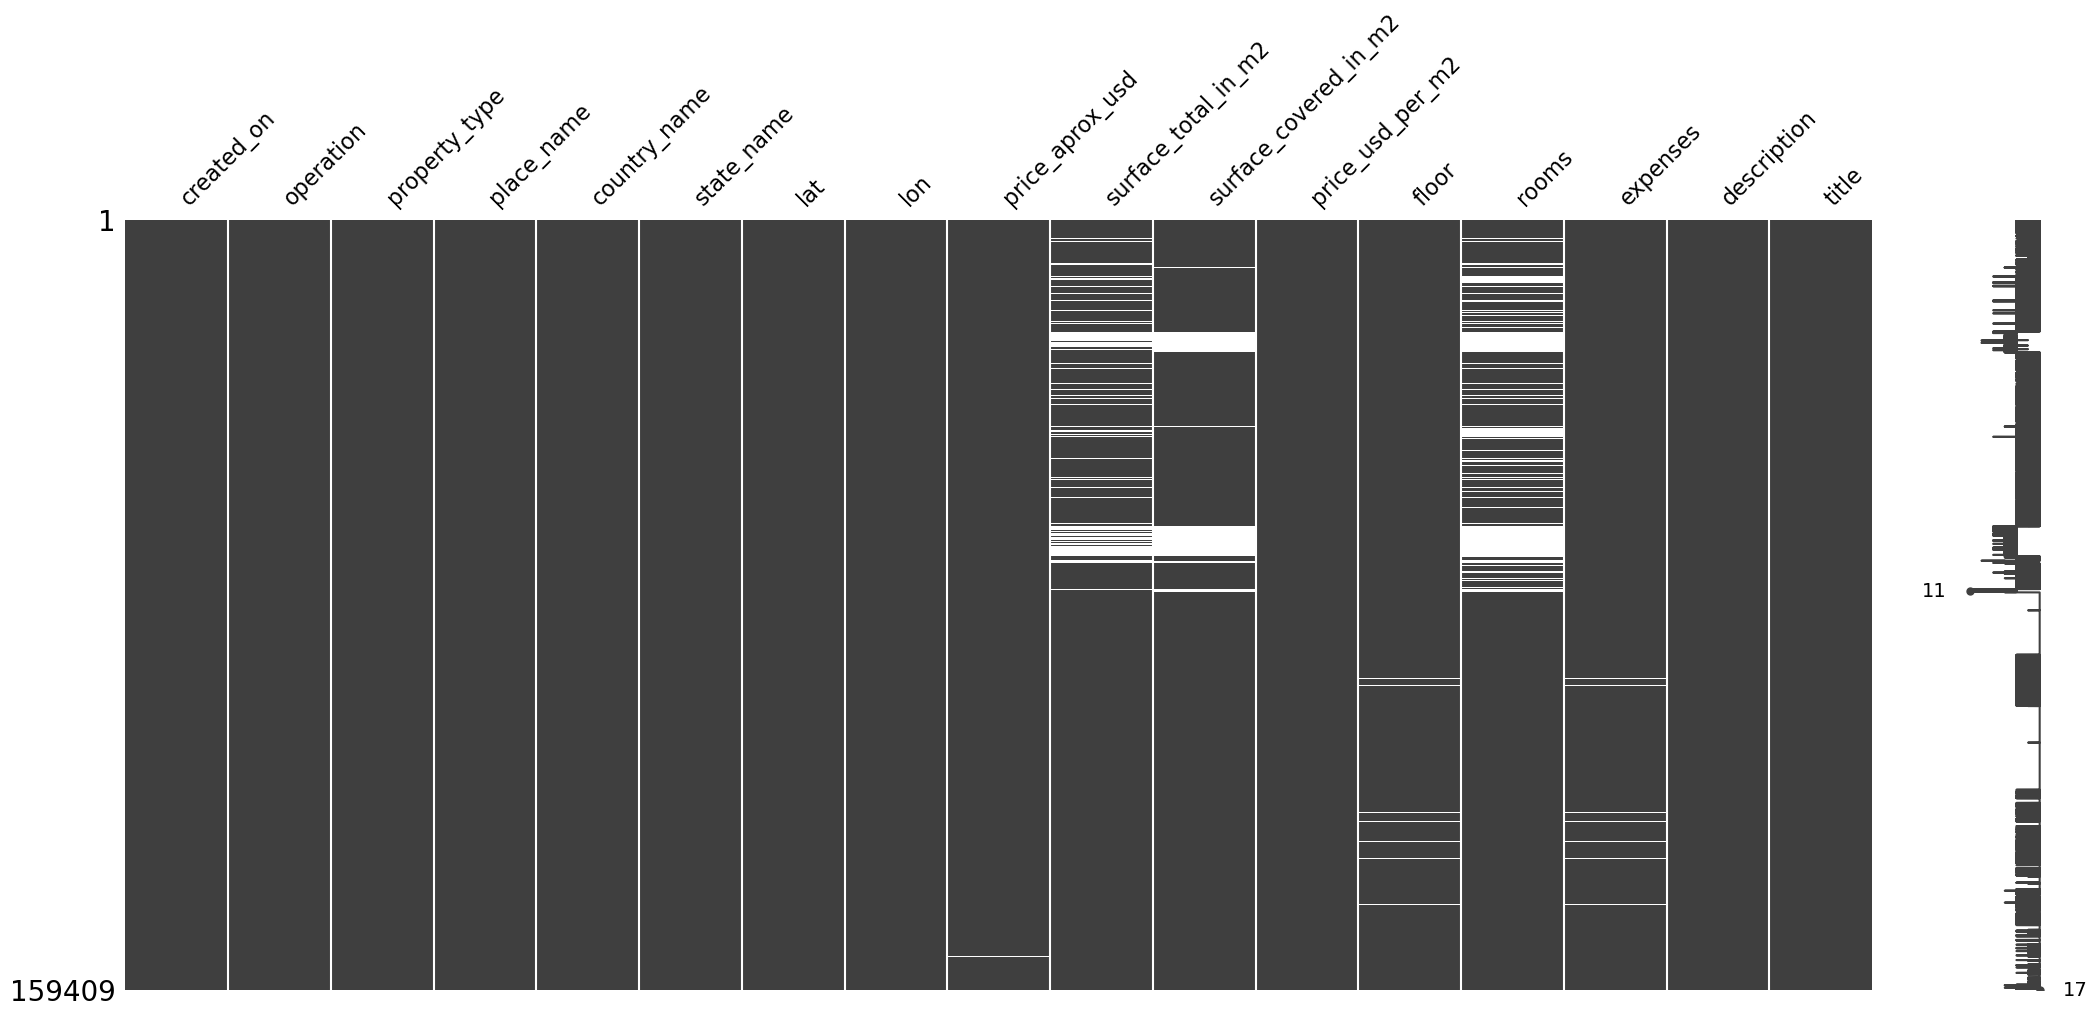

In [46]:
import missingno as msno
msno.matrix(main_data);

[Return to Original Missing No Plot](#msno)


In [47]:
main_data.isna().sum()

created_on                   0
operation                    0
property_type                0
place_name                   0
country_name                 0
state_name                   0
lat                        135
lon                        135
price_aprox_usd            232
surface_total_in_m2      13425
surface_covered_in_m2    11923
price_usd_per_m2            51
floor                     2211
rooms                    22630
expenses                  2211
description                  0
title                        0
dtype: int64

<hr>
<a id="QA"></a>

## IV. Questions with Answers

<a id="Q1"></a>
1. __Geographical__ - Which state has highest & lowest priced properties?

[Return To Index](#Main)

Here, we will calculate the average price of properties across all state names

In [48]:
hdi = cities_data[['STATE', 'CITY', 'IDHM', 'RURAL_URBAN']]
reference_price_hdi = main_data[['state_name','place_name','price_aprox_usd', 'operation']].merge(hdi, how = 'left',
                                 left_on = ['state_name','place_name'], right_on = ['STATE', 'CITY'])
reference_price_hdi = reference_price_hdi[['state_name','place_name', 'price_aprox_usd', 'IDHM','RURAL_URBAN','operation']].dropna()

In [49]:
check = reference_price_hdi\
    .groupby("state_name").mean().reset_index()\
    [["state_name", "price_aprox_usd","IDHM"]]\
    .sort_values(by="price_aprox_usd", ascending = True)

check.head()

,state_name,price_aprox_usd,IDHM
16,Piauí,161.374286,0.670429
10,Mato Grosso do Sul,19487.029412,0.735294
8,Maranhão,52863.982000,0.735200
20,Rondônia,53446.485000,0.691000
1,Amapá,87595.295000,0.733000


***
Now let's plot a bar chart to obtain a better visualisation of the above result. 

__Note:__ These prices include the prices of operations (rent/sale) in common. 
***

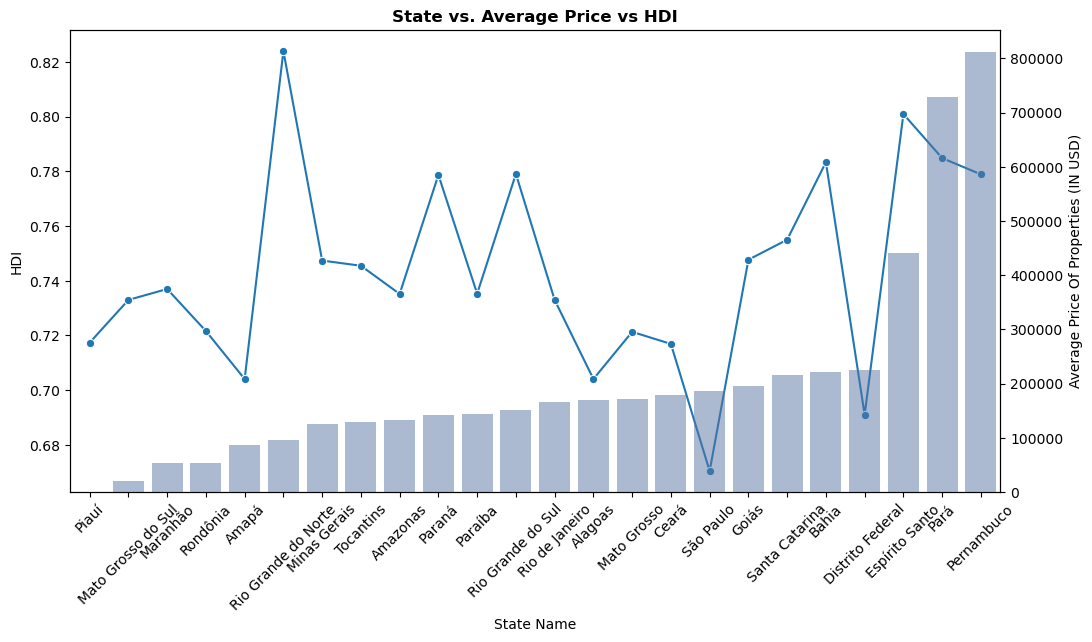

In [50]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)

g = sns.lineplot(data = check['IDHM'], marker='o', ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = check, x='state_name', y='price_aprox_usd', alpha=0.5, ax=ax2, palette=sns.color_palette(['#4C74AE']))

g.set(xlabel="State Name", ylabel="HDI")
plt.ylabel("Average Price Of Properties (IN USD)")
plt.title("State vs. Average Price vs HDI",fontweight="bold");
plt.show()

***
<p>It is observed that cities with higher average price tend to have HDI above 0.76. The cities with the highest range of price in properties are Para, Pernambuco, and Espirito Santo.

It is observed that the city "Rio Grande do Norte" has the highest HDI - above 0.82, and if we look at the average price of the properties here, it can be counted among the cities with the cheapest properties. 

It is observed that the city Espirito Santo has the second highest HDI among all, but it has the property ranges in higher ranges. 

It is observed that the city with lowest HDI - Sao Paulo and Distrito Federal has property prices high middle range (~$200,000). The cities with a good cheaper range of property and almost to 0.78 HDI could be Bahia, Amazonas and Paraiba.</p>
***

<a id="Q2"></a>
2. __Number/Area of rooms__ - How price depends on number of rooms?

[Return To Index](#Main)

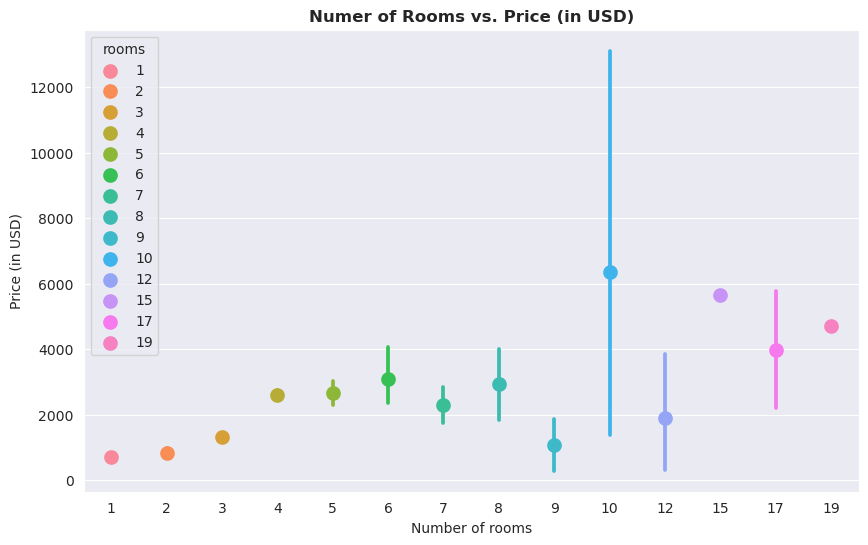

In [51]:
sns.set_style("darkgrid")
rooms_vs_price_approx_usd_rent = main_data[main_data['operation'] == 'rent'].dropna(subset=["rooms"])
rooms_vs_price_approx_usd_rent["rooms"] = rooms_vs_price_approx_usd_rent["rooms"].astype("int")
plt.figure(figsize=(10, 6))
sns.pointplot(x='rooms',y='price_aprox_usd',data=rooms_vs_price_approx_usd_rent, hue='rooms', scale=1.2, estimator="mean")
plt.xlabel('Number of rooms')
plt.ylabel('Price (in USD)')
plt.title('Numer of Rooms vs. Price (in USD)',fontweight="bold");

***
<p>From the central tendencies of “Price in USD” and “No of Rooms” for rental operations, we can observe that as the number of rooms increase, the price of the property increases. But, a legitimate upward trend has been seen with less than 5 rooms.</p>

<p>After comparing the properties with 10 rooms vs 12 rooms, it is observed that although both kinds of properties are listed in the same city with similar mean price per m<sup>2</sup>, the property size (surface area) of the most expensive property has increased from 427.5 m<sup>2</sup> to 1180 m<sup>2</sup>, which contributes directly to the price and thus gives us a higher price of $3836.</p>

***

<a id="Q3"></a>
3. __Property Type and Location__ - How does the property type and urbanization of the city in which the property is located affect price?

[Return To Index](#Main)

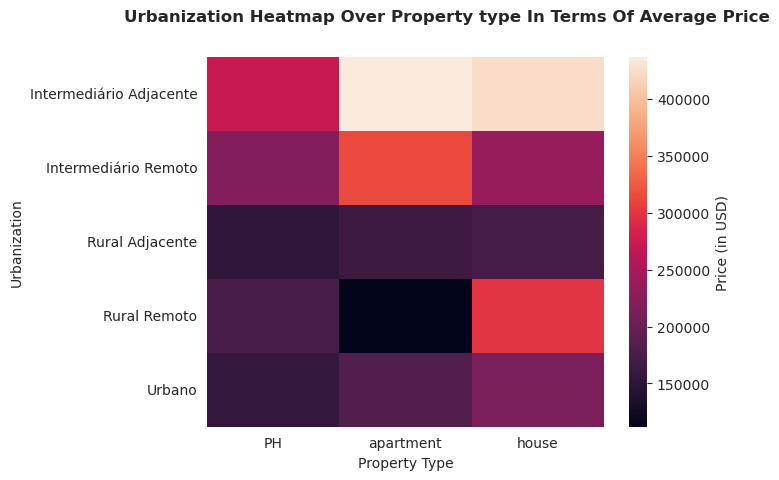

In [52]:
sns.set_style("darkgrid")
hp = main_data\
    .merge(cities_data[["CITY", "RURAL_URBAN"]], left_on="place_name", right_on="CITY", how="left")\
    .query("property_type != 'store'")\
    .groupby(["RURAL_URBAN", "property_type"]).agg({"price_aprox_usd":"mean"})\
    .pivot_table(index="RURAL_URBAN", columns="property_type", values="price_aprox_usd")\
    .query("RURAL_URBAN != '0'")\

chart = sns.heatmap(hp, cbar_kws={'label': 'Price (in USD)'})
chart.set(xlabel='Property Type', ylabel='Urbanization')
plt.suptitle("Urbanization Heatmap Over Property type In Terms Of Average Price",fontweight="bold");

<p>For properties that are "Houses", we observe that the average price in Urbano, Rural Remoto, Intermediario Remoto, and Intermediario Adjacent is high, while Rural Adjacent has relatively low average prices.

For properties that are "Apartment", we observe that the average price in Urbano, Rural Remoto, Rural Adjacent, Intermediario Remoto, and Intermediario Adjacent is high, while Rural Remoto is relatively low.

For properties that are "Penthouse", we observe that the average price in Urbano, Rural Remoto, and Rural Adjacent are relatively low in Rural Remoto, while Intermediario Remoto and Intermediario Adjacent are high.

Overall, the average price for properties "Intermediario Adjacent" cities regardless of the property type are pretty high.</p>
***

<a id="Q4"></a>
4. __Urbanization__ - Which area among urban or rural has max sized properties?

[Return To Index](#Main)

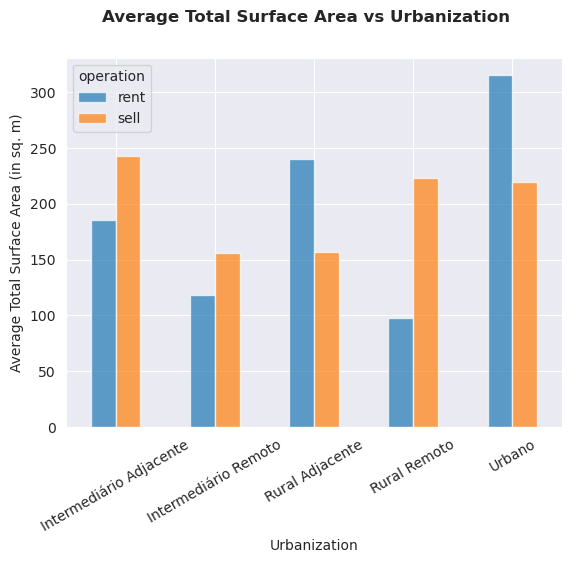

In [53]:
sns.set_style("darkgrid")
ax = main_data\
    .merge(cities_data[["CITY", "RURAL_URBAN"]], left_on="place_name", right_on="CITY", how="left")\
    .groupby(["RURAL_URBAN", "operation"]).agg({"surface_total_in_m2":"mean"})\
    .pivot_table(index="RURAL_URBAN", columns="operation", values="surface_total_in_m2")\
    .query("RURAL_URBAN != '0'")\
    .reset_index()\
    .plot(kind="bar", x="RURAL_URBAN", y=["rent", "sell"], rot=30, alpha=0.7)
plt.suptitle("Average Total Surface Area vs Urbanization",fontweight="bold")
ax.set_xlabel("Urbanization")
ax.set_ylabel("Average Total Surface Area (in sq. m)");

<a id="Q5"></a>
5. __Economic Status__ - How does a city’s economic status affect price?

[Return To Index](#Main)


We want to find out the relationship between property price and the corresponding HDI of the city where the property is located while taking rural vs urban into account.

First, we merged the cities_data table with our main_data table to get the information we needed for each property: the state name, city name, city HDI, and the rural vs urban information of the city where the property is located, as well as the property's price (in USD) and operation type.

In [54]:
hdi = cities_data[['STATE', 'CITY', 'IDHM', 'RURAL_URBAN']]
price_vs_hdi = main_data[['state_name','place_name','price_aprox_usd', 'operation']].merge(hdi, how = 'left',
                                 left_on = ['state_name','place_name'], right_on = ['STATE', 'CITY'])
price_vs_hdi = price_vs_hdi[['state_name','place_name', 'price_aprox_usd', 'IDHM','RURAL_URBAN','operation']].dropna()

Further, we explored the relationship between property price and the HDI of the city where the property is located.



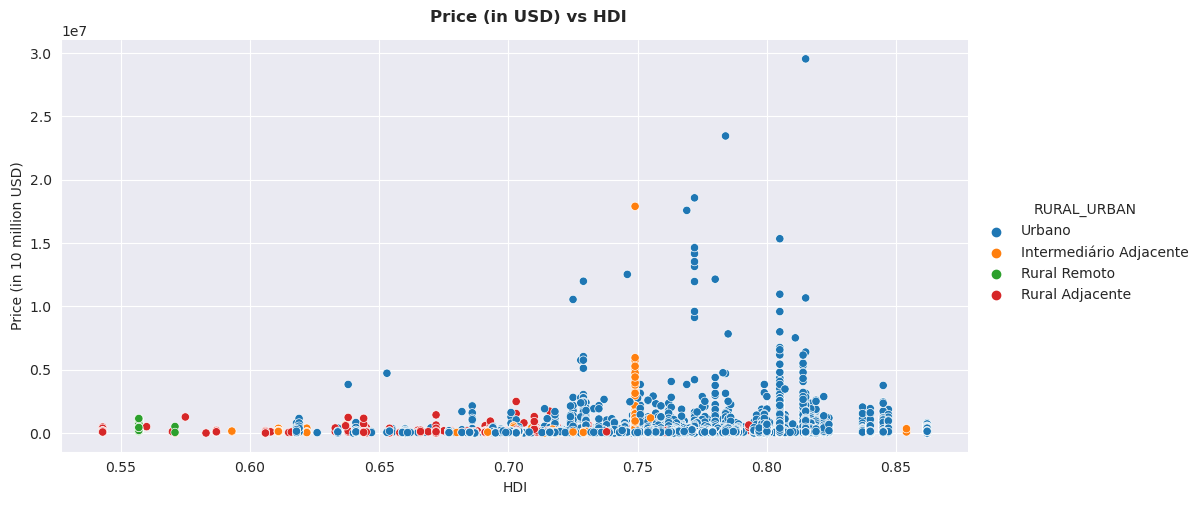

In [55]:
sns.set_style("darkgrid")
g = sns.relplot(data = price_vs_hdi, x = 'IDHM', y = 'price_aprox_usd', hue = 'RURAL_URBAN', kind = 'scatter', aspect = 2)
g.set(xlabel="HDI", ylabel="Price (in 10 million USD)")
g.fig.suptitle('Price (in USD) vs HDI', x = 0.45, y = 1,fontweight="bold")
plt.show()

<ins>Major Discoveries:</ins>

1. Apparently, the cities with high HDI have more properties listed, and the prices of those properties also tend to be higher than those in cities with lower HDI.

2. We can also observe that cities which are in rural areas (Rural Adjacente/Rural Remoto) have fewer properties listed.

3. Worth noting that some cities of Intermediario Adjacente type have relatively high price listings, as the Brazilian government has a plan to modernize and develop those areas. Hence, those areas have great potential and thus higher housing price.
***

<a id="Q6"></a>
6. __Municipal Expenditure vs Population__ - How does the municipal expenditure on a city vary with it's estimated population?

[Return To Index](#Main)

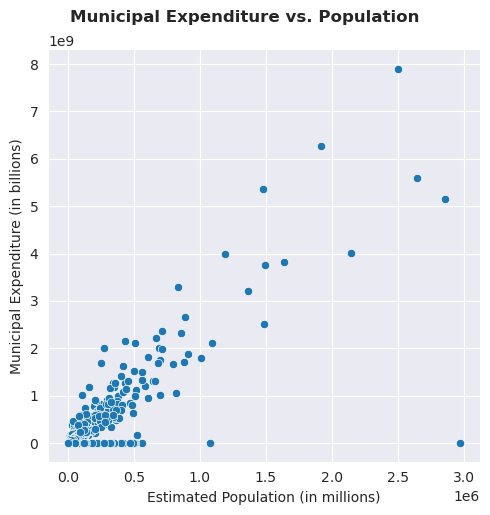

In [56]:
temp = cities_data.copy()
temp["Pop Den"] = temp["ESTIMATED_POP"]/temp["AREA"]
temp = temp[temp["MUN_EXPENDIT"] < 2e10]

sns.set_style("darkgrid")
g = sns.relplot(data = temp[["ESTIMATED_POP", "MUN_EXPENDIT"]], x = 'ESTIMATED_POP', y = 'MUN_EXPENDIT', kind = 'scatter')
g.set(xlabel="Estimated Population (in millions)", ylabel="Municipal Expenditure (in billions)")
g.fig.suptitle('Municipal Expenditure vs. Population', y = 1.02,fontweight="bold")
plt.show()

It can be observed that cities with high estimated population are accompanied with higher Municipal expenditures.
***

<a id="Q7"></a>
7. __Municipal Expenditure and Traffic vs Price__ - How does the average prices vary with a city's municipal spending and traffic levels? 

[Return To Index](#Main)

In [57]:
temp2 = cities_data.copy()
temp2["Traffic"] = (temp2["Cars"] + temp2["Motorcycles"])
temp2 = temp2.drop([4746, 5070], axis = 0)
temp2 = temp2[temp2["MUN_EXPENDIT"] < 2e10]

temp2["Traffic Bucket"] = pd.qcut(temp2.Traffic, q=4, labels=range(4))
temp2.loc[temp2['Traffic Bucket'] == 0, 'Traffic Bucket 2'] = 'Low'
temp2.loc[temp2['Traffic Bucket'] == 1, 'Traffic Bucket 2'] = 'Medium'
temp2.loc[temp2['Traffic Bucket'] == 2, 'Traffic Bucket 2'] = 'High'
temp2.loc[temp2['Traffic Bucket'] == 3, 'Traffic Bucket 2'] = 'Very High'
temp2 = temp2.drop("Traffic Bucket", axis = 1).rename(columns = {"Traffic Bucket 2" : "Traffic Bucket"})

temp2["Municipal Expenditure Bucket"] = pd.qcut(temp2.MUN_EXPENDIT, q=3, labels=range(3))
temp2.loc[temp2['Municipal Expenditure Bucket'] == 0, 'Municipal Expenditure Bucket 2'] = 'Low'
temp2.loc[temp2['Municipal Expenditure Bucket'] == 1, 'Municipal Expenditure Bucket 2'] = 'Medium'
temp2.loc[temp2['Municipal Expenditure Bucket'] == 2, 'Municipal Expenditure Bucket 2'] = 'High'
temp2 = temp2\
    .drop("Municipal Expenditure Bucket", axis = 1)\
    .rename(columns = {"Municipal Expenditure Bucket 2" : "Municipal Expenditure Bucket"})

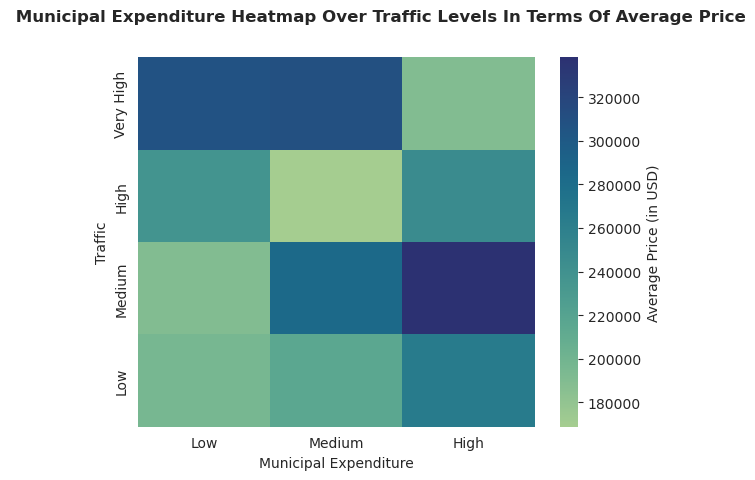

In [58]:
traffic_expenditure_price = main_data\
    .merge(temp2, left_on="place_name", right_on="CITY", how="left")\
    .groupby(["Traffic Bucket", "Municipal Expenditure Bucket"]).mean()[["price_aprox_usd"]].reset_index()\
    .pivot(index = "Traffic Bucket", columns = "Municipal Expenditure Bucket", values = "price_aprox_usd")

traffic_expenditure_price.index = ['Very High', 'High', 'Medium', 'Low']
traffic_expenditure_price.columns = ['Low', 'Medium', 'High']

chart = sns.heatmap(traffic_expenditure_price, cmap="crest", cbar_kws={'label': 'Average Price (in USD)'});
chart.set(xlabel='Municipal Expenditure', ylabel='Traffic')
plt.suptitle(" Municipal Expenditure Heatmap Over Traffic Levels In Terms Of Average Price",fontweight="bold");


<ins>Below are the quantified observations of the above heat map:</ins> 
1. Cities with __high municipal expenditure__ & __medium__ traffic have the maximum average price (dark blue).
2. Cities with __low municipal expenditure__ & __low__ traffic have the __lowest average price__ (light blue).
3. It is also observed on the other hand that the __cities with high municipal expenditure and high/very high traffic has the most favorable average price.__ (Best Suggested)

<ins>Conclusion:</ins> By looking at the graph above, we can suggest a customer with the cities to purchase/rent a property type with the __best city conditions__, which gives us an idea, that cities with high municipal budget are expected to manage traffic efficiently, thus providing better roads and traffic management systems in the city.


<hr>
<a id="Conclusions"></a>

## V. Conclusions

[Return To Index](#Main)


1. In conclusion, if one requires the cheapest properties, we would need to look at Rural Adjacent and Urban regions of Brazil. Although, the Rural Adjacent regions have relatively __low__ human development and thus won't be the optimal choice for a safe and healthy community.

2. On the other hand, looking at Intermediate cities, we generally observe higher property prices combined with smaller property sizes. So, they may not be the best choice.

3. If one wants to buy an apartment with a __low__ budget, then the apartments in the “Rural Remote” or “intermeidario Adjacent” cities are suitable as the prices are reasonable. If the budget is __high__, then the apartments in “Intermediary Remoto” or “Rural Remoto” cities are suitable. In general, properties in "Rural Adjacente" cities are suitable since the community is well developed and the mean area is large.

4. If a person is looking for a property to __rent__ with a __budget of $5000__, they're recommended __not__ to seek properties with more than 5 rooms.

5. In terms of __HDI__, the density of the properties are relatively high where the location with higher HDI. Instead, the lower the HDI, the fewer properties list in the area. The reason is that the Brazilian government plans to modernize and develop these areas. As a result, these areas have great potential and hence higher house prices.

6. Rio Grande do Norte, Amazonas and Parabia__ are particularly value-for-money cities as they have properties in lower price ranges ($100-200k) while providing better life quality. On the other hand, São Paulo and Distrito Federal cities provide lower life quality while having more expensive properties. So, we would not suggest them as a good choice.


7. It would be wise to choose properties in cities with high HDI indexes for better quality of life. Therefore, buyers with large budget(> $3M) are recommended to search properties in Urbano areas having better quality life. Whereas, buyers should also consider Intermediario Adjacente areas, since they provide great value for investment, and buyers with a lower budget can also consider renting in the aforementioned areas.


8. If a person is looking for a larger population city, they're recommended to look at the __higher municipal expenditure city__.

9. If a person has a high budget buying a property, they're recommended to look at a city that has high municipal expenditure and medium traffic. If a person has a limited budget, they're recommended to look at a city that has medium municipal expenditure and high traffic. If a person has a reasonable budget, they're recommended to look at a city that has medium municipal expenditure and medium traffic.

***
<a id="References"></a>

## VI. References

[Return To Index](#Main)

“Brazilian Cities.” Kaggle, https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES_REV2022.CSV. 
“ISO 3166-2:BR.” Wikipedia, Wikimedia Foundation, 18 Sept. 2022, https://en.wikipedia.org/wiki/ISO_3166-2:BR.
Guedes, Gilvan, et al. “Revisiting the Hierarchy of Urban Areas in the Brazilian Amazon: A Multilevel Approach.” Population and Environment, U.S. National Library of Medicine, May 2009, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3488306/.
“Matplotlib 3.6.2 Documentation#.” Matplotlib Documentation - Matplotlib 3.6.2 Documentation, https://matplotlib.org/stable/index.html.
Nations, United. “Human Development Index.” Human Development Reports, 9 Nov. 2022, https://hdr.undp.org/data-center/human-development-index#/indicies/HDI. 
“Properati Data.” Properati., https://www.properati.com.ar/data. 
“Rural and Urban Typologies in Brazil a Comparison with the Proposed Global Methodology Claudio Stenner Coordinator of Geography of Brazilian Institute. - PPT Carregar.” SlidePlayer, https://slideplayer.com.br/slide/17498136/. 
“Seaborn.heatmap.” Seaborn.heatmap - Seaborn 0.12.1 Documentation, https://seaborn.pydata.org/generated/seaborn.heatmap.html. 
“Sign In.” RPubs, https://rpubs.com/agrilive/brazil-development-analysis. 